In [ ]:
%matplotlib inline

# モジュールのインポート
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats
import sys
import statsmodels.formula.api as smf
import itertools
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Google Colaboratoryで作業する場合はこちらも実行してください。
from google.colab import drive
drive.mount('/content/drive')
# %cd 以降にこのnotebookを置いているディレクトリを指定してください。
%cd "/content/drive/MyDrive"

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
# データの読み込み
# INPUT_DIRにtrain.csvなどのデータを置いているディレクトリを指定してください。
INPUT_DIR = "./Colab Notebooks/データ科学実践/"

df = pd.read_csv(INPUT_DIR + "store_sales.csv")
df.head()

,sales,area,distance,rivals,density,parking,eating_space,main_street
0,87.6,58.121727,6.941218,2.0,11.966089,0,0,0
1,92.0,53.186809,5.700467,5.0,11.127574,0,1,1
2,96.3,55.668847,4.500544,3.0,16.835161,1,0,0
3,85.1,44.352024,5.749738,4.0,39.470058,0,1,0
4,86.4,46.541696,8.016232,2.0,17.731017,0,0,0


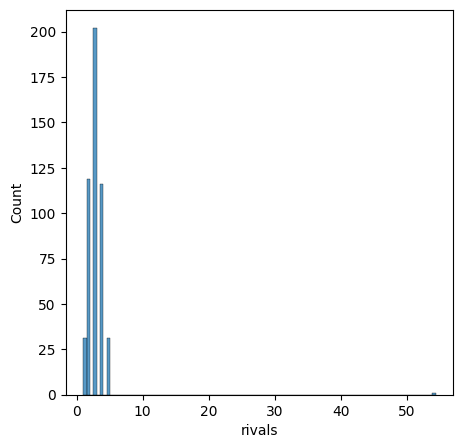

平均値：3.09670333552, 中央値：3.0


In [ ]:
# x3:競合の数についてヒストグラム
plt.figure(figsize=(5, 5))
sns.histplot(data=df, x='rivals')
plt.show()
# x3の平均値と中央値を求める
x3_mean=df["rivals"].mean()
x3_median=df["rivals"].median()
print(f"平均値：{x3_mean}, 中央値：{x3_median}")

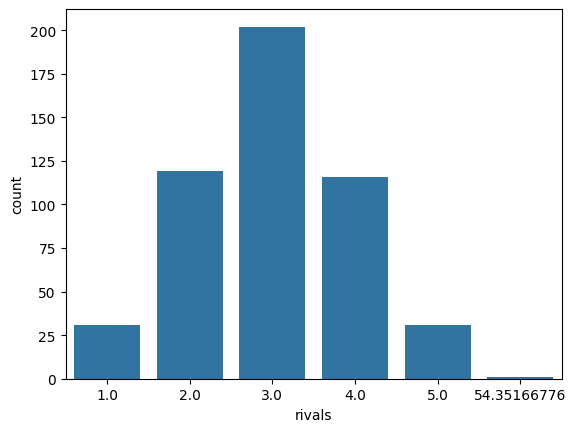

In [ ]:
# x7の棒グラフ
sns.countplot(data=df, x='rivals')
plt.show()

In [ ]:
# 競合店についての外れ値を除外
df = df.query('rivals <= 50')
df.head()

,sales,area,distance,rivals,density,parking,eating_space,main_street
0,87.6,58.121727,6.941218,2.0,11.966089,0,0,0
1,92.0,53.186809,5.700467,5.0,11.127574,0,1,1
2,96.3,55.668847,4.500544,3.0,16.835161,1,0,0
3,85.1,44.352024,5.749738,4.0,39.470058,0,1,0
4,86.4,46.541696,8.016232,2.0,17.731017,0,0,0


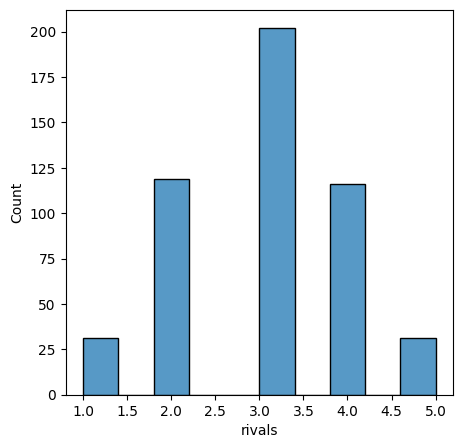

平均値：2.993987975951904, 中央値：3.0


In [ ]:
# x3:競合の数についてヒストグラム
plt.figure(figsize=(5, 5))
sns.histplot(data=df, x='rivals')
plt.show()
# x3の平均値と中央値を求める
x3_mean=df["rivals"].mean()
x3_median=df["rivals"].median()
print(f"平均値：{x3_mean}, 中央値：{x3_median}")

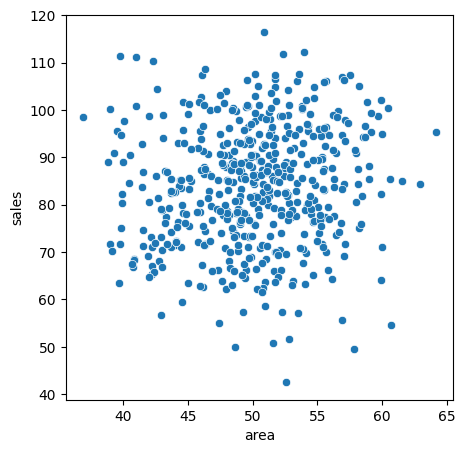

0.11091837882109412

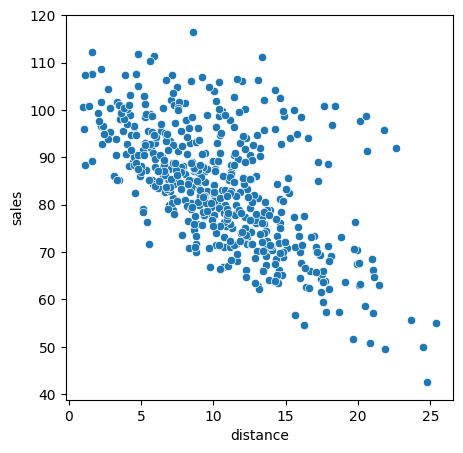

-0.6050310071322493

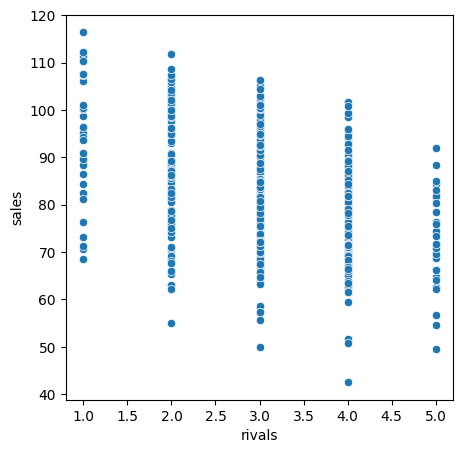

-0.3924046489202941

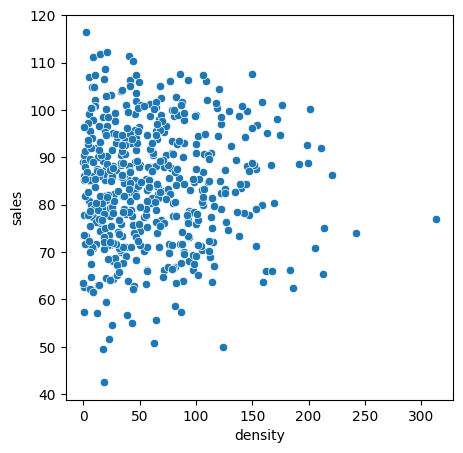

0.0032085110271990484

In [ ]:
# 散布図
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x='area', y='sales')
plt.show()
display(df['area'].corr(df['sales']))
# 散布図
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x='distance', y='sales')
plt.show()
display(df['distance'].corr(df['sales']))
# 散布図
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x='rivals', y='sales')
plt.show()
display(df['rivals'].corr(df['sales']))
# 散布図
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x='density', y='sales')
plt.show()
display(df['density'].corr(df['sales']))

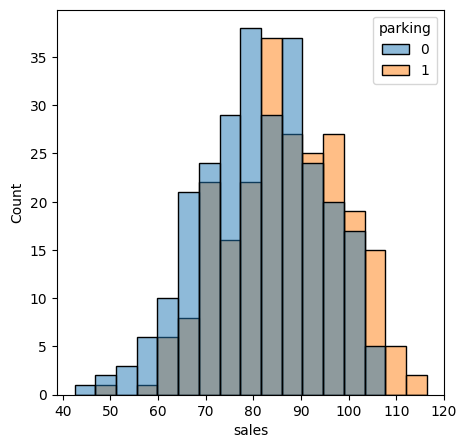

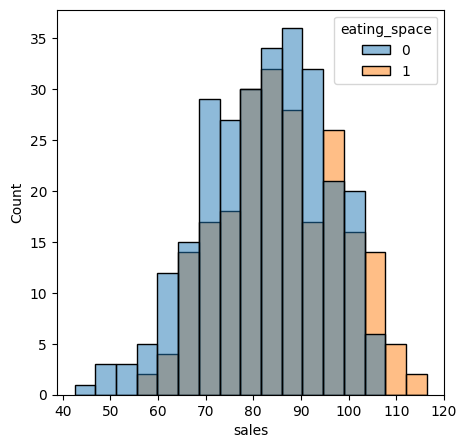

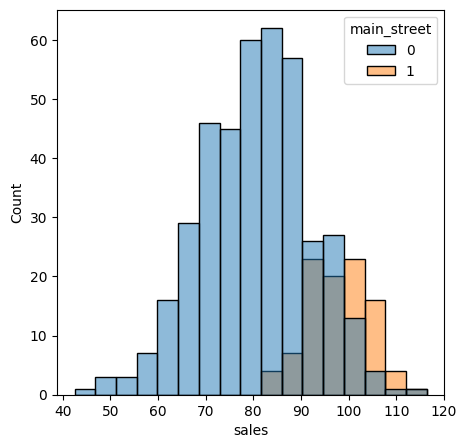

In [ ]:
# 質的変数で層別したヒストグラム
plt.figure(figsize=(5, 5))
sns.histplot(data=df, x='sales', hue='parking')
plt.show()
# 質的変数で層別したヒストグラム
plt.figure(figsize=(5, 5))
sns.histplot(data=df, x='sales', hue='eating_space')
plt.show()
# 質的変数で層別したヒストグラム
plt.figure(figsize=(5, 5))
sns.histplot(data=df, x='sales', hue='main_street')
plt.show()

In [ ]:
# 関数の定義
# 交互作用項を含まない回帰式のリストを取得するための関数
def get_model_list_interaction_none(descriptors, name):
    models = []
    for n in range(1, len(descriptors)+1):
        for comb in itertools.combinations(descriptors, n):
            model_description = name + ' ~ ' + ' + '.join(comb)
            models.append(model_description)

    return models

# 交互作用項をひとつ含む回帰式のリストを取得するための関数
def get_model_list_interaction_one(descriptors, name):
    models = []
    for n in range(1, len(descriptors)+1):
        for comb in itertools.combinations(descriptors, n):
            model_description = name + ' ~ ' + ' + '.join(comb)
            models.append(model_description)

            interactions = []
            for interaction in itertools.combinations(comb, 2):
                interactions.append(' * '.join(interaction))
            for interaction in interactions:
                model_description = name + ' ~ ' + ' + '.join(comb) + ' + ' + interaction
                models.append(model_description)

    return models

# すべての交互作用項を含む回帰式のリストを取得するための関数
def get_model_list_interaction_all(descriptors, name):
    models = []
    for n in range(1, len(descriptors)+1):
        for comb in itertools.combinations(descriptors, n):
            interactions = []
            for interaction in itertools.combinations(comb, 2):
                interactions.append(' * '.join(interaction))
            for m in range(len(interactions)+1):
                for comb_interactions in itertools.combinations(interactions, m):
                    if len(comb_interactions)==0:
                        model_description = name + ' ~ ' + ' + '.join(comb)
                    else:
                        model_description = name + ' ~ ' + ' + '.join(comb) + ' + ' + ' + '.join(comb_interactions)
                    models.append(model_description)

    return models

def get_model_list(descriptors, target, interaction='none'):
    if interaction=='none':
        models = get_model_list_interaction_none(descriptors, target)
    elif interaction=='one':
        models = get_model_list_interaction_one(descriptors, target)
    elif interaction=='all':
        models = get_model_list_interaction_all(descriptors, target)
    else:
        interactions = ['none', 'one', 'all']
        if interaction not in interactions:
            raise ValueError(f"interaction must be one of {', '.join(interactions)}")

    return models

In [ ]:
# 交差項を含まないパターン
min_ec = sys.float_info.max
opt_model = ''
opt_results = None

# 候補となるすべての回帰式を含むリストを取得
descriptors = ['area', 'distance', 'rivals', 'density', 'parking','eating_space', 'main_street']
target = 'sales'
models = get_model_list(descriptors, target) # interactionを省略した場合， デフォルトで interaction='none' と設定されます．

# BICと回帰式を表示(タイトル行)
print('BIC\t\t formula')

# すべての説明変数の組に対してBICを計算し，BICが最小となる説明変数の組を求める
for model in models:
    # 候補となる回帰式modelとデータdfから回帰係数を推定し，分析結果を得る
    results = smf.ols(model, df).fit()

    # 現在の回帰式に対するBIC
    ec = results.bic

    # BICと回帰式を表示
    print('{:.0f}\t {}'.format(ec, model))

    # 現在のBICがこれまでのBICの最小値よりも小さい場合，　min_ec, opt_model, opt_resultsを更新
    if ec < min_ec:
        min_ec = ec
        opt_model = model
        opt_results = results

# BICが最小の回帰式と分析結果を表示
print('\noptimum model : {}'.format(opt_model))
display(opt_results.summary())

BIC		 formula
3953	 sales ~ area
3732	 sales ~ distance
3876	 sales ~ rivals
3959	 sales ~ density
3936	 sales ~ parking
3947	 sales ~ eating_space
3774	 sales ~ main_street
3729	 sales ~ area + distance
3875	 sales ~ area + rivals
3959	 sales ~ area + density
3936	 sales ~ area + parking
3946	 sales ~ area + eating_space
3776	 sales ~ area + main_street
3567	 sales ~ distance + rivals
3738	 sales ~ distance + density
3729	 sales ~ distance + parking
3720	 sales ~ distance + eating_space
3381	 sales ~ distance + main_street
3882	 sales ~ rivals + density
3849	 sales ~ rivals + parking
3861	 sales ~ rivals + eating_space
3689	 sales ~ rivals + main_street
3943	 sales ~ density + parking
3954	 sales ~ density + eating_space
3780	 sales ~ density + main_street
3930	 sales ~ parking + eating_space
3749	 sales ~ parking + main_street
3761	 sales ~ eating_space + main_street
3561	 sales ~ area + distance + rivals
3735	 sales ~ area + distance + density
3725	 sales ~ area + distance + parking

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     652.8
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          1.25e-230
Time:                        13:38:43   Log-Likelihood:                -1426.3
No. Observations:                 499   AIC:                             2867.
Df Residuals:                     492   BIC:                             2896.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       97.4885      2.115     46.099      0.000      93.333     101.644
area             0.2408      0.039      6.213      0.000       0.165       0.317
distance        -1.6629      0.041    -40.205      0.000      -1.744      -1.582
rivals          -5.1078      0.195    -26.139      0.000      -5.492      -4.724
parking          3.1736      0.388      8.188      0.000       2.412       3.935
eating_space     4.9924      0.385     12.975      0.000       4.236       5.748
main_street     16.6951      0.482     34.638      0.000      15.748      17.642
==============================================================================
Omnibus:                       20.789   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.647
Skew:                           0.264   Prob(JB):                     6.69e-09
Kurtosis:                       4.237   Cond. No.                         572.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# 交差項を１つ考慮パターン
min_ec = sys.float_info.max
opt_model = ''
opt_results = None

# 候補となるすべての回帰式を含むリストを取得
descriptors = ['area', 'distance', 'rivals', 'parking','eating_space', 'main_street']
target = 'sales'
models = get_model_list(descriptors, target, "one") # interactionを省略した場合， デフォルトで interaction='none' と設定されます．

# BICと回帰式を表示(タイトル行)
print('BIC\t\t formula')

# すべての説明変数の組に対してBICを計算し，BICが最小となる説明変数の組を求める
for model in models:
    # 候補となる回帰式modelとデータdfから回帰係数を推定し，分析結果を得る
    results = smf.ols(model, df).fit()

    # 現在の回帰式に対するBIC
    ec = results.bic

    # BICと回帰式を表示
    print('{:.0f}\t {}'.format(ec, model))

    # 現在のBICがこれまでのBICの最小値よりも小さい場合，　min_ec, opt_model, opt_resultsを更新
    if ec < min_ec:
        min_ec = ec
        opt_model_2 = model
        opt_results_2 = results

# BICが最小の回帰式と分析結果を表示
print('\noptimum model : {}'.format(opt_model_2))
display(opt_results_2.summary())

BIC		 formula
3953	 sales ~ area
3732	 sales ~ distance
3876	 sales ~ rivals
3936	 sales ~ parking
3947	 sales ~ eating_space
3774	 sales ~ main_street
3729	 sales ~ area + distance
3733	 sales ~ area + distance + area * distance
3875	 sales ~ area + rivals
3881	 sales ~ area + rivals + area * rivals
3936	 sales ~ area + parking
3942	 sales ~ area + parking + area * parking
3946	 sales ~ area + eating_space
3950	 sales ~ area + eating_space + area * eating_space
3776	 sales ~ area + main_street
3782	 sales ~ area + main_street + area * main_street
3567	 sales ~ distance + rivals
3573	 sales ~ distance + rivals + distance * rivals
3729	 sales ~ distance + parking
3734	 sales ~ distance + parking + distance * parking
3720	 sales ~ distance + eating_space
3726	 sales ~ distance + eating_space + distance * eating_space
3381	 sales ~ distance + main_street
3294	 sales ~ distance + main_street + distance * main_street
3849	 sales ~ rivals + parking
3853	 sales ~ rivals + parking + rivals * p

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1202.
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          2.62e-304
Time:                        13:38:46   Log-Likelihood:                -1250.4
No. Observations:                 499   AIC:                             2517.
Df Residuals:                     491   BIC:                             2551.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               98.2434      1.488     66.007      0.000      95.319     101.168
area                     0.2877      0.027     10.518      0.000       0.234       0.341
distance                -1.9779      0.032    -61.206      0.000      -2.041      -1.914
rivals                  -5.0800      0.138    -36.945      0.000      -5.350      -4.810
parking                  3.3954      0.273     12.442      0.000       2.859       3.932
eating_space             5.0011      0.271     18.473      0.000       4.469       5.533
main_street             -0.5150      0.839     -0.614      0.540      -2.164       1.134
distance:main_street     1.6187      0.072     22.422      0.000       1.477       1.761
==============================================================================
Omnibus:                        4.011   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                3.861
Skew:                          -0.170   Prob(JB):                        0.145
Kurtosis:                       3.266   Cond. No.                         573.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# 回帰式の推定
# modelに回帰式を指定すること
model = opt_model_2
results = smf.ols(model, df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1202.
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          2.62e-304
Time:                        13:40:17   Log-Likelihood:                -1250.4
No. Observations:                 499   AIC:                             2517.
Df Residuals:                     491   BIC:                             2551.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               98.2434      1.488     66.007      0.000      95.319     101.168
area                     0.2877      0.027     10.518      0.000       0.234       0.341
distance                -1.9779      0.032    -61.206      0.000      -2.041      -1.914
rivals                  -5.0800      0.138    -36.945      0.000      -5.350      -4.810
parking                  3.3954      0.273     12.442      0.000       2.859       3.932
eating_space             5.0011      0.271     18.473      0.000       4.469       5.533
main_street             -0.5150      0.839     -0.614      0.540      -2.164       1.134
distance:main_street     1.6187      0.072     22.422      0.000       1.477       1.761
==============================================================================
Omnibus:                        4.011   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                3.861
Skew:                          -0.170   Prob(JB):                        0.145
Kurtosis:                       3.266   Cond. No.                         573.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

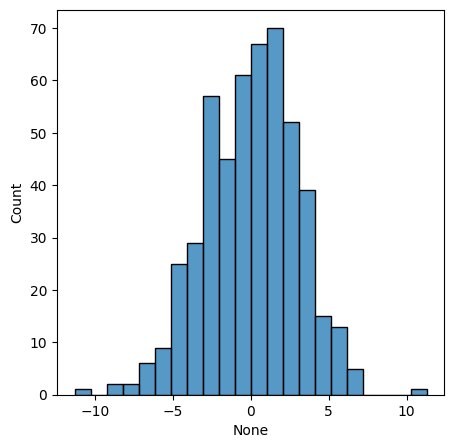

In [ ]:
# 残差のヒストグラム
plt.figure(figsize=(5, 5))
sns.histplot(data=df, x=df['sales']-results.fittedvalues)
plt.show()

((array([-2.99148779, -2.70949569, -2.55092824, -2.43849088, -2.35038866,
         -2.27745777, -2.21494281, -2.16004641, -2.11097846, -2.06652166,
         -2.02580925, -1.98820138, -1.95321175, -1.92046179, -1.88965077,
         -1.86053573, -1.83291741, -1.8066303 , -1.7815354 , -1.75751472,
         -1.73446731, -1.71230602, -1.69095513, -1.67034836, -1.65042742,
         -1.63114071, -1.61244233, -1.5942913 , -1.57665082, -1.55948776,
         -1.54277217, -1.52647685, -1.51057708, -1.49505026, -1.47987574,
         -1.46503453, -1.45050917, -1.43628356, -1.42234281, -1.40867313,
         -1.39526172, -1.38209668, -1.36916692, -1.35646209, -1.34397251,
         -1.33168913, -1.31960346, -1.30770751, -1.2959938 , -1.28445526,
         -1.27308524, -1.26187747, -1.250826  , -1.23992522, -1.22916982,
         -1.21855477, -1.20807526, -1.19772678, -1.187505  , -1.17740581,
         -1.1674253 , -1.15755974, -1.14780558, -1.13815942, -1.12861802,
         -1.11917828, -1.10983722, -1.

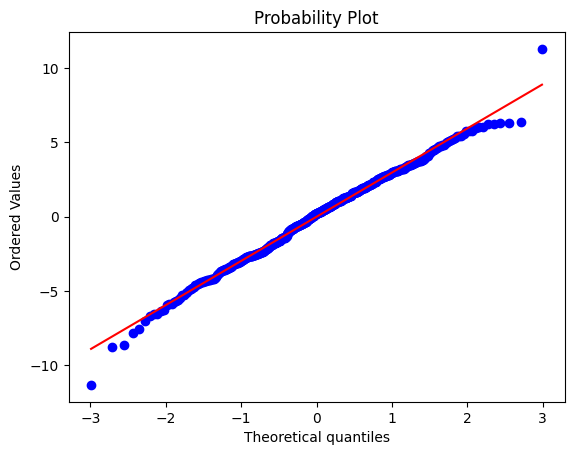

In [ ]:
# Q-Qプロット
stats.probplot(df['sales']-results.fittedvalues, dist='norm', plot=plt)

In [ ]:
import scipy.stats as stats
# Shapilo-Wilkの正規性検定
stats.shapiro(df['sales']-results.fittedvalues)

ShapiroResult(statistic=0.9944000840187073, pvalue=0.06453172117471695)

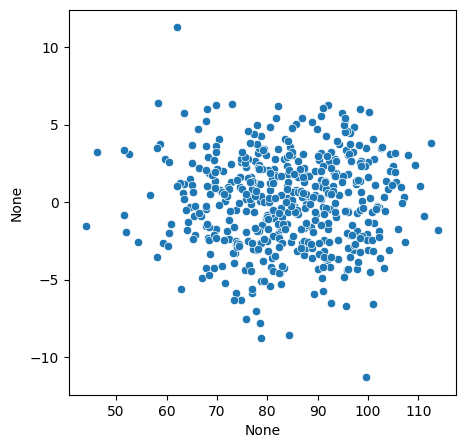

In [ ]:
#　残差プロット
plt.figure(figsize=(5, 5))
sns.scatterplot(x=results.fittedvalues, y=df['sales']-results.fittedvalues)
plt.show()